In [1]:
import pandas as pd
import numpy as np 
# import stopwordsiso
# import jieba
# from stopwordsiso import stopwords
import matplotlib.pyplot as plt
import keras
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
'''Display'''
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

D:\anaconda\envs\PythonGPU\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
train = pd.read_csv('D:/MyDownloads/df_train.csv')

In [4]:
train.head()

,tweets,label,tweets_flat,tweets_chinese,tweets_cut,tweets_clean,n,f,s,t,nr,ns,nt,nw,nz,v,vd,vn,a,ad,an,d,m,q,r,p,c,u,xc,w,PER,LOC,ORG,TIME,O,n_pos,n_neg,word_count
0,"[{'tweet_content': '请多多注意防护预防感染常戴口罩', 'posting...",0,请多多注意防护预防感染常戴口罩 走在乡间的小路上乡村风景美如画 空运的螃蟹到了快来领取啊 何...,请多多注意防护预防感染常戴口罩 走在乡间的小路上乡村风景美如画 空运的螃蟹到了快来领取啊 何...,请 多多 注意 防护 预防 感染 常 戴口罩 走 在 乡间 的 小路 上 乡村 风景 美...,多多 注意 防护 预防 感染 常 戴口罩 走 乡间 小路 乡村 风景 美如画 空运 螃蟹...,0.20,0.02,0.01,0.01,0.02,0.00,0.00,0.00,0.02,0.27,0.00,0.02,0.06,0.00,0.00,0.07,0.03,0.00,0.10,0.04,0.03,0.12,0.01,0.00,0.01,0.04,0.00,0.00,0.00,0.11,0.38,2878
1,"[{'tweet_content': '你敢不敢让我中个小恐龙', 'posting_tim...",0,你敢不敢让我中个小恐龙 周年庆邀你盛装出席 5月1日5月8日参与周年庆活动分享你的周年庆时装...,你敢不敢让我中个小恐龙 周年庆邀你盛装出席 月 日 月 日参与周年庆活动分享你的周年庆时装...,你 敢不敢 让 我 中 个 小 恐龙 周年庆 邀 你 盛装 出席 月 日 月 日 参...,敢不敢 恐龙 周年庆 邀 盛装 出席 参与 周年庆 活动 分享 周年庆 时装 穿 搭...,0.19,0.01,0.00,0.00,0.03,0.00,0.00,0.00,0.01,0.33,0.00,0.01,0.06,0.01,0.00,0.10,0.02,0.01,0.11,0.03,0.02,0.09,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.08,0.36,1957
2,[{'tweet_content': '滴 613打卡成功 天气好的一天 看见小泽自拍 心情...,0,滴 613打卡成功 天气好的一天 看见小泽自拍 心情更加好 以后多发呗 早上好呀天泽 天气好...,滴 打卡成功 天气好的一天 看见小泽自拍 心情更加好 以后多发呗 早上好呀天泽 天气好...,滴 打卡 成功 天气 好 的 一天 看见 小泽 自拍 心情 更加 好 ...,滴 打卡 成功 天气 一天 看见 小泽 自拍 心情 更加 以后 多发 ...,0.21,0.03,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.30,0.00,0.00,0.10,0.01,0.00,0.06,0.01,0.00,0.03,0.01,0.01,0.08,0.07,0.00,0.03,0.00,0.00,0.07,0.00,0.14,0.32,384
3,[{'tweet_content': '有没有人跟我一样的卡了我2天52个精英令用都用不鸟这...,0,有没有人跟我一样的卡了我2天52个精英令用都用不鸟这波过去不卸载我是 我在打卡啦每日签到领红...,有没有人跟我一样的卡了我 天 个精英令用都用不鸟这波过去不卸载我是 我在打卡啦每日签到领红...,有没有 人 跟 我 一样 的 卡 了 我 天 个 精英令 用 都 用 不 鸟 这 波 ...,有没有 卡 天 精英令 鸟 波 过去 卸载 打卡 每日 签到 领 红包 签到 越多...,0.21,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.01,0.32,0.00,0.02,0.06,0.01,0.01,0.08,0.02,0.01,0.10,0.04,0.01,0.10,0.04,0.00,0.01,0.00,0.00,0.01,0.00,0.11,0.35,1402
4,[{'tweet_content': '婚姻不分年龄希望决定结婚之前能够想清楚对方是你想要相...,0,婚姻不分年龄希望决定结婚之前能够想清楚对方是你想要相伴一生的人而且不管前路好坏面对诱惑时你还...,婚姻不分年龄希望决定结婚之前能够想清楚对方是你想要相伴一生的人而且不管前路好坏面对诱惑时你还...,婚姻 不分 年龄 希望 决定 结婚之前 能够 想清楚 对方 是 你 想要 相伴 一生 的 人...,婚姻 不分 年龄 希望 决定 结婚之前 能够 想清楚 想要 相伴 一生 前路 好坏 面对 诱...,0.17,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.31,0.00,0.02,0.06,0.01,0.01,0.11,0.02,0.00,0.11,0.03,0.03,0.09,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.11,0.33,2034


In [6]:
words = []
for i in train['tweets_clean']:
    words.append(str(i).split())

In [8]:
maxLen=1000
num_features=100
min_word_count=2

model=Word2Vec(words,vector_size=num_features,min_count=min_word_count)

In [43]:
model.save('./wordvec100')

In [44]:
word2vec_model = Word2Vec.load('./wordvec100')

In [9]:
y = train.label

In [10]:
dataset=[]
for i in train['tweets_clean']:
    dataset.append(str(i))

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(filters='')  
tokenizer.fit_on_texts(dataset)
vocab=tokenizer.word_index 

In [12]:
x_train, x_val, y_train, y_val = train_test_split(dataset, y, test_size=0.2, random_state=1,shuffle=True)

In [13]:
x_train_word_ids=tokenizer.texts_to_sequences(x_train)
x_val_word_ids = tokenizer.texts_to_sequences(x_val)
x_train_padded_seqs=pad_sequences(x_train_word_ids,maxlen=200) #将超过固定值的部分截掉，不足的在最前面用0填充
x_val_padded_seqs=pad_sequences(x_val_word_ids,maxlen=200)

In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_train = y_train.tolist()
label_val = y_val.tolist()
y_train = to_categorical(label_train)
y_val = to_categorical(label_val)
print("To_Categorical")
print(y_train[0])
print(y_val[0])

To_Categorical
[0. 1.]
[1. 0.]


In [17]:
print( x_train_padded_seqs.shape )
print(x_val_padded_seqs.shape )
print( y_train.shape )
print( y_val.shape )

(16858, 200)
(4215, 200)
(16858, 2)
(4215, 2)


## CNN

In [18]:
from keras.layers import Embedding, Conv1D, MaxPool1D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import categorical_crossentropy

In [19]:
embedding_matrix = np.zeros((len(vocab)+1, 100))
for word, i in vocab.items():
    try:
        embedding_vector = model.wv[str(word)]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        continue

In [20]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.models import Model
from keras import regularizers

def build_cnn_model():
    
    main_input = Input(shape=(200,), dtype='float64')
        # 词嵌入（使用预训练的词向量）
    embedder = Embedding(len(vocab) + 1,100, input_length=200, weights=[embedding_matrix], trainable=False)#使用Embeeding层将每个词编码转换为词向量
    embed = embedder(main_input)
    
    cnn1 = Conv1D(256, 3, padding='same', strides=1, activation='relu')(embed)
    cnn1 = MaxPooling1D(pool_size=198)(cnn1)
    cnn2 = Conv1D(256, 4, padding='same', strides=1, activation='relu')(embed)
    cnn2 = MaxPooling1D(pool_size=197)(cnn2)
    cnn3 = Conv1D(256, 5, padding='same', strides=1, activation='relu')(embed)
    cnn3 = MaxPooling1D(pool_size=196)(cnn3)
    # 合并三个模型的输出向量
    cnn = concatenate([cnn1, cnn2, cnn3], axis=-1)
    
    flat = Flatten()(cnn)
    
    #bn = BatchNormalization()(flat)
    
    #merged = Dense(64, activation='relu')(bn)
    
    drop = Dropout(0.5)(flat)
    
    main_output = Dense(2, activation='sigmoid')(drop)
    model = Model(inputs=main_input, outputs=main_output)
    
    #optimizer = Adam(lr=0.01)
    #optimizer = SGD(lr=learning_rate2, momentum=momentum, decay=decay_rate, nesterov=False)

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

In [21]:
cnn_model = build_cnn_model()
cnn_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     77913400    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 200, 256)     77056       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 200, 256)     102656      embedding[0][0]                  
_______________________________________________________________________________________

In [22]:
cnn_history = cnn_model.fit(x_train_padded_seqs,y_train,epochs=10,batch_size=128,shuffle=True,validation_split=0.2)

Epoch 1/10
106/106 [==============================] - 72s 683ms/step - loss: 0.6989 - accuracy: 0.8444 - val_loss: 0.2838 - val_accuracy: 0.9098
Epoch 2/10
106/106 [==============================] - 65s 617ms/step - loss: 0.3675 - accuracy: 0.8983 - val_loss: 0.2499 - val_accuracy: 0.9107
Epoch 3/10
106/106 [==============================] - 64s 606ms/step - loss: 0.2823 - accuracy: 0.9129 - val_loss: 0.2355 - val_accuracy: 0.9110
Epoch 4/10
106/106 [==============================] - 67s 628ms/step - loss: 0.2235 - accuracy: 0.9249 - val_loss: 0.2279 - val_accuracy: 0.9143
Epoch 5/10
106/106 [==============================] - 68s 641ms/step - loss: 0.1843 - accuracy: 0.9344 - val_loss: 0.2252 - val_accuracy: 0.9170
Epoch 6/10
106/106 [==============================] - 69s 650ms/step - loss: 0.1619 - accuracy: 0.9416 - val_loss: 0.2218 - val_accuracy: 0.9176
Epoch 7/10
106/106 [==============================] - 72s 684ms/step - loss: 0.1404 - accuracy: 0.9485 - val_loss: 0.2379 - val_ac

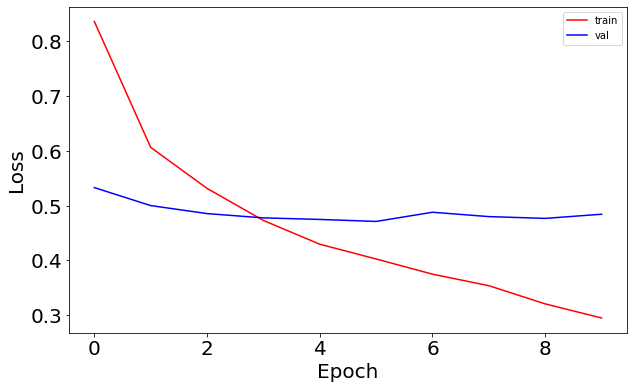

In [23]:
# Visualize the loss
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(cnn_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(cnn_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [24]:
prob_val = cnn_model.predict(x_val_padded_seqs)
pred_val = prob_val.argmax(axis=-1)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_val.argmax(axis=-1), pred_val))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2218
           1       0.96      0.87      0.91      1997

    accuracy                           0.92      4215
   macro avg       0.92      0.92      0.92      4215
weighted avg       0.92      0.92      0.92      4215

